<a href="https://colab.research.google.com/github/Nakakakilig/DS_coursework/blob/main/%D0%9A%D1%83%D1%80%D1%81%D0%BE%D0%B2%D0%B0%D1%8F_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####**Описание работы:**


&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом. 
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей. Работа должна включать в себя следующие обязательные пункты: 
1. Описание данных *(с расчетом базовых статистик)*, 
2. Исследование зависимостей и формулирование гипотез, 
3. Построение моделей для прогнозирования оттока на основе проверенных гипотез и выявленных взаимосвязей 


Во втором разделе обязательно должно присутствовать обоснование гипотез, описание выявленных взаимосвязей, а также их визуализация. 


<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

In [1]:
# Загрузим библиотеки и модули
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Описание данных

In [2]:
### Загрузим датафрейм ###
source_df = pd.read_csv('telecom_users.csv')

# Для EDA сделаем копию датафрейма и с ней будем работать. 
# Делаю так потому, что в пайплайн моделей будут подаваться данные в исходном виде.
# А весь препроцессинг, генерация новых признаков и т.д. будет происходить уже внутри
eda_df = source_df.copy()

# Сразу убираем столбцы Unnamed и CustomerID
eda_df = source_df.drop(['Unnamed: 0','customerID'], axis=1)

# Посмотрим на датасет и на типы данных по столбцам
eda_df.info()
eda_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5986 non-null   object 
 1   SeniorCitizen     5986 non-null   int64  
 2   Partner           5986 non-null   object 
 3   Dependents        5986 non-null   object 
 4   tenure            5986 non-null   int64  
 5   PhoneService      5986 non-null   object 
 6   MultipleLines     5986 non-null   object 
 7   InternetService   5986 non-null   object 
 8   OnlineSecurity    5986 non-null   object 
 9   OnlineBackup      5986 non-null   object 
 10  DeviceProtection  5986 non-null   object 
 11  TechSupport       5986 non-null   object 
 12  StreamingTV       5986 non-null   object 
 13  StreamingMovies   5986 non-null   object 
 14  Contract          5986 non-null   object 
 15  PaperlessBilling  5986 non-null   object 
 16  PaymentMethod     5986 non-null   object 


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [3]:
# Все столбцы все столбцы з категориальными признаками, кроме tensure, MonthlyCharges и TotalCharges
# Переведём все столбцы сразу в нужный нам тип, чтобы было удобней работать

numerical_features = ['tenure','MonthlyCharges','TotalCharges']
categorical_features = [name for name in eda_df.columns.to_list() if name not in numerical_features]

# приведём категориальные признаки к нужному типу данных
eda_df[categorical_features] = eda_df[categorical_features].astype('category')

# TotalCharges по какой то причине имеет тип обьект. Приведём к числовому значению
eda_df['TotalCharges'] = pd.to_numeric(eda_df['TotalCharges'], errors='coerce')
eda_df[numerical_features] = eda_df[numerical_features].astype('float')

eda_df.dtypes

gender              category
SeniorCitizen       category
Partner             category
Dependents          category
tenure               float64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object

In [4]:
# Проверим на наличие пропущенных значений
print(eda_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            5986 non-null   category
 1   SeniorCitizen     5986 non-null   category
 2   Partner           5986 non-null   category
 3   Dependents        5986 non-null   category
 4   tenure            5986 non-null   float64 
 5   PhoneService      5986 non-null   category
 6   MultipleLines     5986 non-null   category
 7   InternetService   5986 non-null   category
 8   OnlineSecurity    5986 non-null   category
 9   OnlineBackup      5986 non-null   category
 10  DeviceProtection  5986 non-null   category
 11  TechSupport       5986 non-null   category
 12  StreamingTV       5986 non-null   category
 13  StreamingMovies   5986 non-null   category
 14  Contract          5986 non-null   category
 15  PaperlessBilling  5986 non-null   category
 16  PaymentMethod     5986 n

In [5]:
# В столбце TotalCharges есть пропущенные значения, посмотрим на эти строки внимательнее
eda_df[eda_df['TotalCharges'].isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
356,Male,0,No,Yes,0.0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN,No
634,Female,0,Yes,Yes,0.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
2771,Male,0,Yes,Yes,0.0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
3086,Male,0,Yes,Yes,0.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
3255,Male,0,Yes,Yes,0.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
4326,Female,0,Yes,Yes,0.0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
5375,Male,0,No,Yes,0.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
5382,Female,0,Yes,Yes,0.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5695,Female,0,Yes,Yes,0.0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
5951,Male,0,Yes,Yes,0.0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No


**У всех 10 пользователей tenure = 0 , значит они еще ни разу вносили плату.**

**В таком случае можно заполнить пропущенные значения нулями.**

In [6]:
# Заполняем нулями пропущенные значения.
eda_df.TotalCharges.fillna(0, inplace=True)

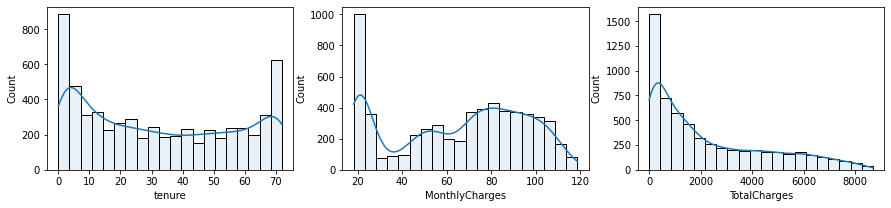

In [7]:
fix, ax = plt.subplots(nrows=1,ncols=3, figsize=(15,3))
counter = 0
for name in eda_df[['tenure','MonthlyCharges','TotalCharges']]:
  sns.histplot(eda_df[name],ax=ax[counter],kde=True,alpha=.1,bins=20)
  counter+=1

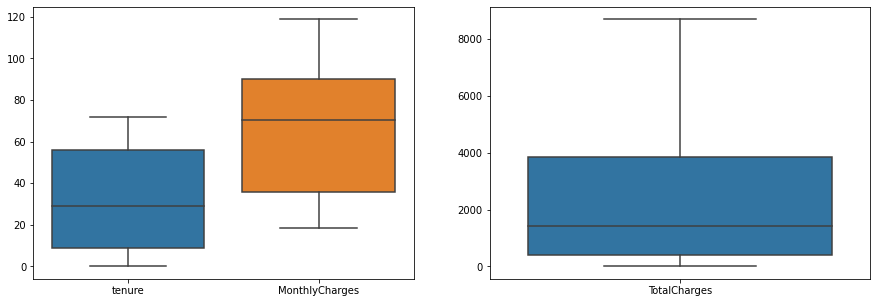

In [8]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.boxplot(data=eda_df[['tenure','MonthlyCharges']], ax=ax[0])
sns.boxplot(data=eda_df[['TotalCharges']],ax=ax[1])
plt.show()

**Ни одна из величин не распределена нормально, похоже что у tenure бимодальное распределение. У TotalCharges очевидная асимметрия с длинным "хвостом" справа. Но выбросов(outliers) нет, и это уже неплохо.**

**Теперь посмотрим на оставшиеся категориальные признаки.**

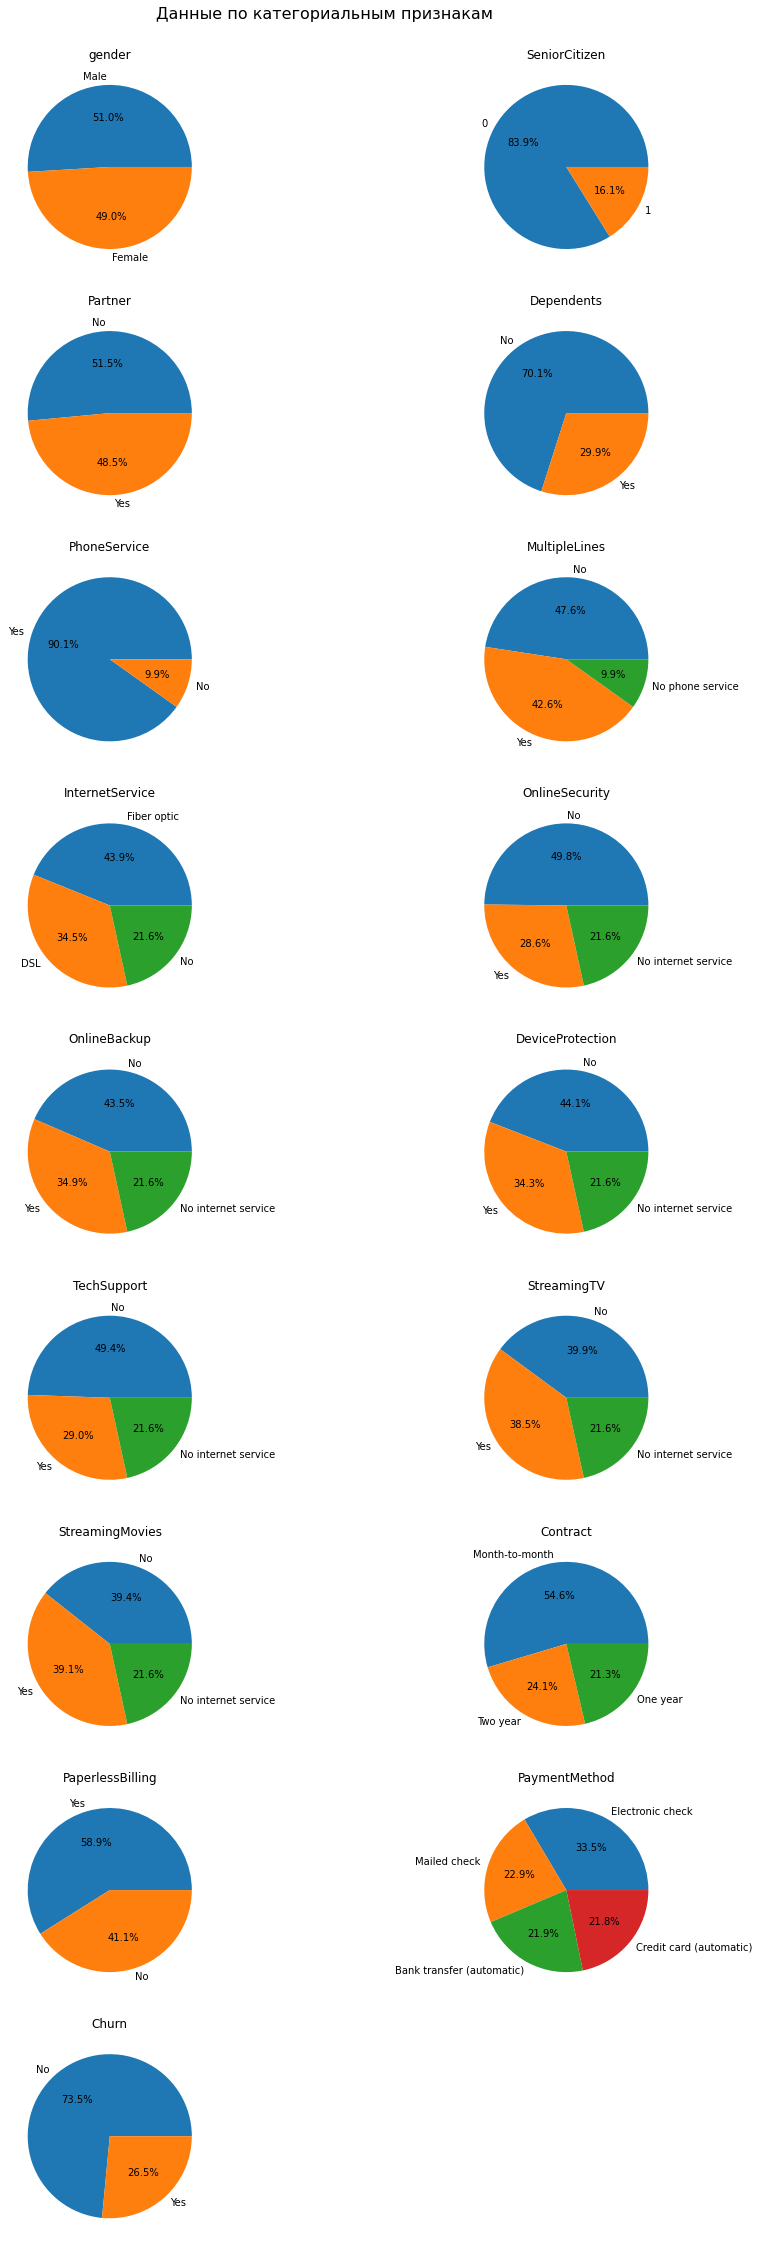

In [9]:
fig, ax = plt.subplots(9,2, figsize=(15,40))
counter = 0
for i in range(9):
    for j in range(2):
        df_temp=eda_df[categorical_features[counter]].value_counts()
        ax[i,j].pie(df_temp, autopct='%.1f%%', labels=df_temp.index)
        ax[i,j].set_title(categorical_features[counter])
        counter += 1
        if counter > 16:
            break
ax[8,1].remove()
plt.suptitle('Данные по категориальным признакам', x=.5,y=.9, fontsize=16);


**Глядя на эти данные можно сразу сказать, что датасет не сбалансирован. Чуть больше четверти клиентов ушли в "отток". Это нужно будет учитвать при разбивке на тренировочную и тестовую части. Необходимо будет использовать стратифицированную выборку.**


# 2. Исследование зависимостей и формулирование гипотез

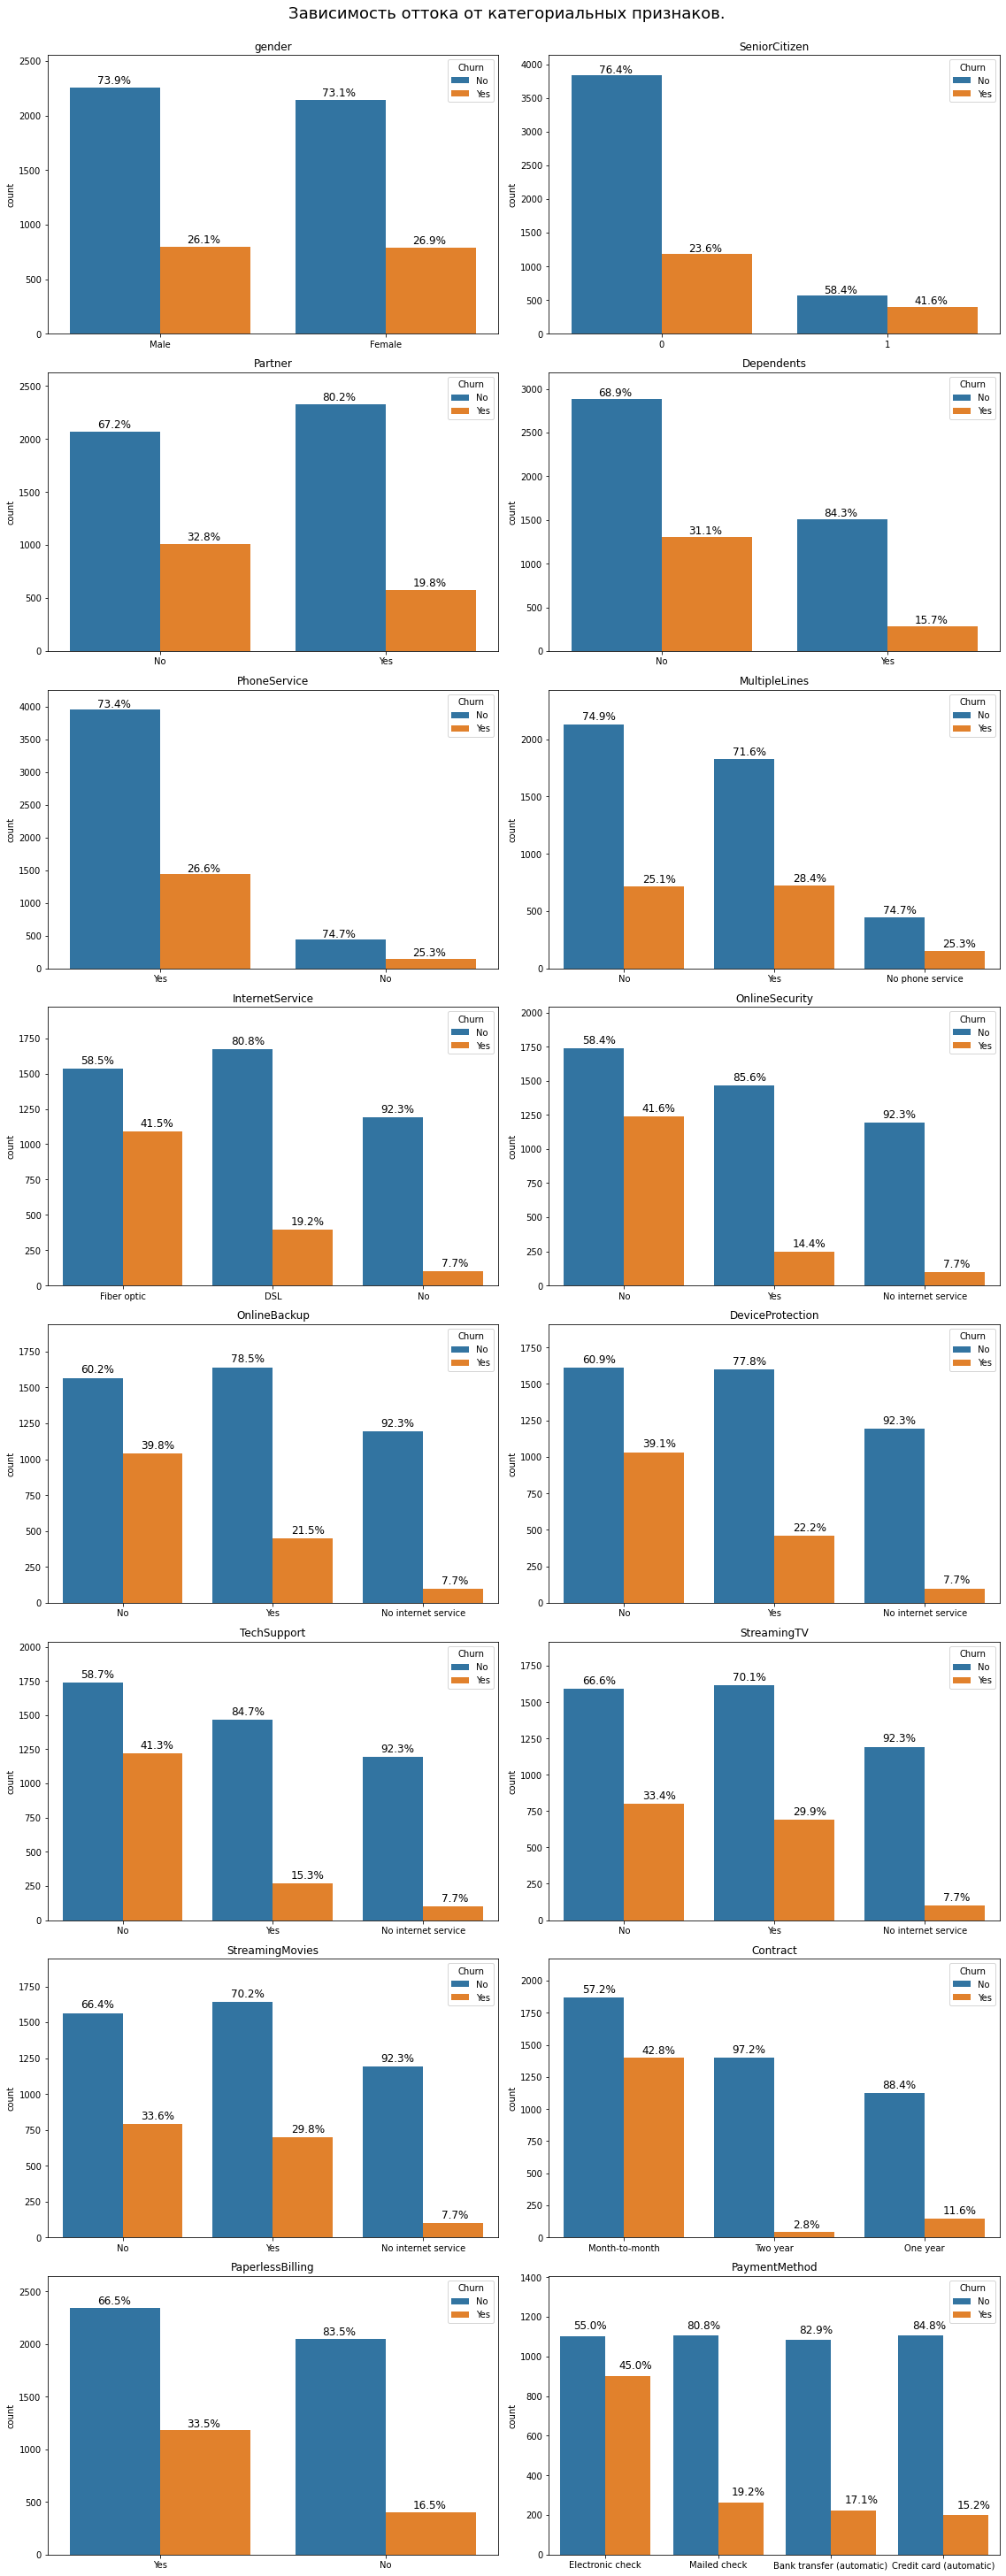

In [10]:
# Сначала посмотрим на зависимость оттока от категориальных признаков
fig, ax = plt.subplots(8, 2, figsize=(16,40))

counter = 0
for i in range(8):
    for j in range(2):
        sns.countplot(data=eda_df, x=categorical_features[counter], hue='Churn',
                      order=eda_df[categorical_features[counter]].value_counts()
                      .sort_values(ascending=False).index,
                      ax=ax[i,j])
        
        heights = [p.get_height() for p in ax[i,j].patches]
        patch = [p for p in ax[i,j].patches]
        num_cat = eda_df[categorical_features[counter]].nunique()
      
        for n in range(num_cat):
            total = eda_df[categorical_features[counter]].value_counts().values[n]
            for m in range(2):
                percentage = '{:.1f}%'.format(100*heights[(m*num_cat + n)]/total)
                x = patch[(m*num_cat + n)].get_x() + patch[(m*num_cat + n)].get_width() / 2 -0.08
                y = patch[(m*num_cat + n)].get_y() + patch[(m*num_cat + n)].get_height()+35
                ax[i,j].annotate(percentage, (x,y), size=12)
        
        ax[i,j].set_title(ax[i,j].get_xlabel())
        ax[i,j].set_xlabel('')
        ax[i,j].set_ylim(0,max(heights)+300)
        counter += 1
plt.tight_layout()
plt.suptitle('Зависимость оттока от категориальных признаков.', y=1.01, fontsize=18)
plt.show()

Выводы:

1. Пол (gender): и среди мужчин, и среди женщин одинаковый процент пользователей уходит в "отток". Вероятно этот признак не даст никакой информации для моделей.
2. Пенсионеры(SeniorCitizen): Само респределение между пенсионерами и не пенсионерами сильно перекошено в сторону вторых. Но при этом среди пенсионеров почти вдвое выше процент ушедших в "отток"
3. Состоит ли в браке (partner): Вполне ожидаемо, что среди людей, состоящих в браке, процент оттока существенно ниже.
4. Есть ли иждивенцы(Dependents): Тут тоже вполне ожидаемо, что у клиентов с иждивенцами процент оттока существенно ниже. Когда у людей есть определённые обязательства, они вероятно предпочитают стабильность поиску новых вариантов.
5. Есть ли телефонная связь(PhoneService): Процент оттока одинаковый среди обоих типов клиентов. Похоже это вообще не влияет на вероятность "оттока"
6. Несколько телефонных линий(MultipleLines): Среди тех клиентов, у кого есть телефонная связь, процент оттока очень близкий и среди клиентов использующих одну телефонную линию и среди тех, кто использует только одну линию.
7. Тип интернета(InternetService): Самый низкий процент оттока среди тех клиентов, которы не пользуются интернетом вообще. А вот среди тех, кто пользуется - у клиентов на "оптоволокне" процент оттока значительно выше, чем у клиентов с ADSL.
8. Дополнительные сервисы, большая часть (OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport): Картина для всех сервисов похожая. Самый большой процент оттока у тех клиентов, у которых интернет подключён, но они по каким-то причинам конкретным сервисом не пользуются. Среди тех, у кого вообще услуги интернета не подключено - процент оттока значительно меньше.
9. Дополнительные сервисы, стриминговые услуги(StreamingTV, StreamingMovies): Тут довольно похожий процент оттока, середи тех кто пользуется сервисом, и среди тех, кто не пользуется.
10. Тип контракта(Contract): Всё также вполне ожидаемо, что наибольший процент оттока, среди тех клиентов, кто оплачивает услуги помесячно. Туда явно входят и новые клиенты. И конечно среди тех, кто сразу на долгое время контракт подписал отток существенно меньше. Причем с увеличением срока контракта - процент оттока уменьшается.
11. Услуга безбумажного биллинга(PaperlessBilling): Процент оттока вдвое выше среди тех, кто пользуется этой услугой. Возможно стоит проверить сколько SeniorCitizen пользуется этой услугой.
12. Метод оплаты(PaymentMethod): Процент оттока существенно выше среди тех, кто осуществляет оплату электронным чеком. Остальные категории имеют довольно близки процент оттока.

**Попробуем теперь посмотреть, на взаимосвязь признаков с целевой переменной, но уже используя метрики.**

Можно было бы посчитать корреляцию каждого признака с целевым, но дело в том, что корреляция может показать лишь линейную зависмость.

К счастью есть еще метрика взаимной информации(Mutual Information). Она довольно много преимуществ имеет, одно из которых - работа с любыми зависимостями(как линейными, так и нелинейными).

In [11]:
# Чтобы MutualInfo посчитать, сначалай прийдётся всё перевести в числовой формат
cat_list = eda_df.select_dtypes(['category']).columns.to_list()

In [12]:
eda_df[cat_list] = eda_df[cat_list].apply(lambda x: x.factorize()[0], axis = 0)

In [13]:
from sklearn.feature_selection import mutual_info_classif
# Воспользуемся функцией mutual_info_classif из библиотеки sklearn. 
# Она считает mutual information для категориальной целевой переменной.

X_mi = eda_df.drop(['Churn'], axis=1)
y_mi = eda_df.Churn

# Для точного расчета в функцию нужно передать список столбцов (точнее список булевых значений (True, False)),
# значения которых являются дискретными. Tenure у нас тоже дискретный, так что его тип поменяем на integer.
eda_df['tenure'] = eda_df['tenure'].astype('int')
discr_features = [pd.api.types.is_integer_dtype(t) for t in X_mi.dtypes]

scores = mutual_info_classif(X_mi, y_mi, discrete_features=discr_features, random_state=0)
scores_df = pd.Series(scores, name='MI scores', index=X_mi.columns)
print(scores_df.sort_values(ascending=False))

Contract            0.097921
tenure              0.076608
OnlineSecurity      0.063917
TechSupport         0.060610
InternetService     0.053157
MonthlyCharges      0.050225
TotalCharges        0.045544
OnlineBackup        0.045500
PaymentMethod       0.043067
DeviceProtection    0.043023
StreamingMovies     0.030816
StreamingTV         0.030717
PaperlessBilling    0.018599
Dependents          0.013740
Partner             0.010901
SeniorCitizen       0.010465
MultipleLines       0.000659
gender              0.000046
PhoneService        0.000045
Name: MI scores, dtype: float64


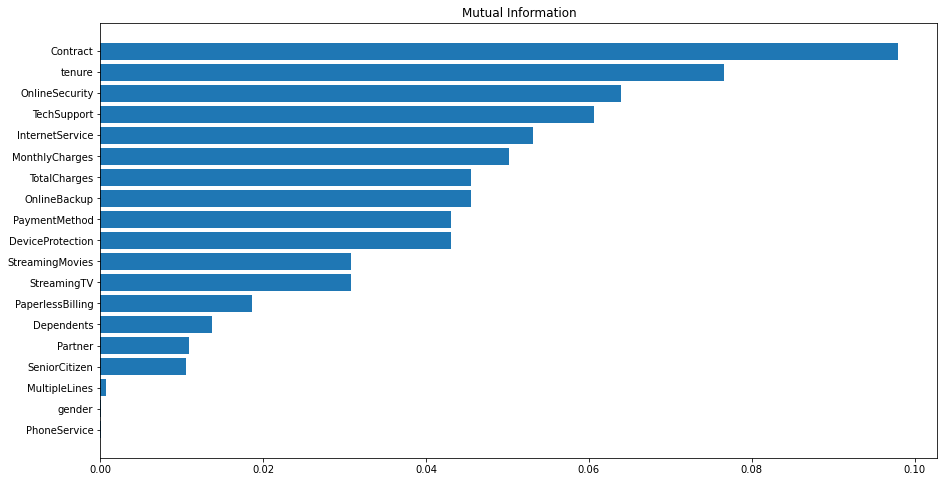

In [14]:
plt.figure(figsize=(15,8))

sorted_scores = scores_df.sort_values(ascending=True)
width = np.arange(len(sorted_scores))
ticks = list(sorted_scores.index)
plt.barh(width,sorted_scores)
plt.yticks(width,ticks)
plt.title("Mutual Information")
plt.show()

**Выводы**



*   Признаков с нулевыми оценками нет. Это значит, что и gender и PhoneService могут нести информацию, полезную для построения моделей. Хотя они могут и просто лишний шум привносить.
*   Новые сгенерированные признаки(если не брать разбивку на годовые интервалы) - не особо много информации в себе несут, но всё же они лучше чем те же gender или PhoneService объясняют поведение целевой переменной.
*    Попробуем на основании этой информации понизить размерность, при простроении моделей. Попробуем оставить разное количество признаков.



# 3. Построение моделей для прогнозирования оттока

*   Будем использовать 7 моделей: Логистическую регрессию, К-ближайших соседей, Решающие деревья, Случайный лес, Наивный Байесовский классификатор, Градиентный бустинг.
*   Объединим все модели стэкингом, для этого будем использовать StackingClassifier из sklearn
Посчитаем метрики для базовых моделей.
*   Будем использовать следующие метрики: balanced accuracy, precision, recall, fbeta(с коэффициентом 2), roc-auc.




In [15]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,balanced_accuracy_score,precision_score,\
                            recall_score,fbeta_score,roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder                                  


In [16]:
# Функция для удобного представления оценок моделей
def model_score(model, X_test, y_test):
    name = ''
    scores = {}
    scores['balanced_accuracy'] = balanced_accuracy_score(y_test, model.predict(X_test))
    scores['precision'] = precision_score(y_test, model.predict(X_test))
    scores['recall'] = recall_score(y_test, model.predict(X_test))
    scores['fbeta'] = fbeta_score(y_test, model.predict(X_test), beta=2)
    if hasattr(model,'predict_proba'):
        scores['ROC_AUC'] = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    else:
        scores['ROC_AUC'] = roc_auc_score(y_test, model.decision_function(X_test))
    if str(model).split('(')[0] == 'StackingClassifier':
        name = 'StackingClassifier'
    else:
        name = str(model.get_params()['steps'][-1][1]).split('(')[0]
    return pd.DataFrame(scores, index=[name])


In [17]:
# К сожалению в общем случае sklearn не умеет на ходу кодировать целевую переменную.
# Так что прийдётся делать это заранее.
X = source_df.drop('Churn', axis=1)
y = source_df['Churn'].map({'Yes': 1, 'No': 0}).values

# Разделим выборку на тренировочную и тестовую части.
# Поскольку выборка несбалансирована, будем использовать стратификацию по y.
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Создадим списки категориальных и чисовых переменных. 
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
cat_features = [name for name in X.columns.to_list()[2:] if name not in num_features]
print('num_features:', num_features)
print('cat_features:', cat_features)

num_features: ['tenure', 'MonthlyCharges', 'TotalCharges']
cat_features: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [18]:
# Теперь соберем минимальный препроцессинг для датасета.
# Применим OrdinalEncoder к категориальным признакам.
# Для числовых только заполним пропущенные значения. Все ненужные столбцы отбросим.

minimal_prep = ColumnTransformer(
                                [('num', SimpleImputer(missing_values=' ',strategy='constant', fill_value=0), num_features),
                                 ('cat', OrdinalEncoder(), cat_features)]
                                )

# Теперь создадим пайплайны для моделей
# Логистическая регрессия
simple_lr = Pipeline(steps=[('preprocessing', minimal_prep),
                            ('classifier', LogisticRegression(random_state=42, n_jobs=-1))])
# К-ближайших соседей
simple_knn = Pipeline(steps=[('preprocessing', minimal_prep),
                             ('classifier', KNeighborsClassifier(n_jobs=-1))])
# Решающие деревья
simple_dtc = Pipeline(steps=[('preprocessing', minimal_prep),
                             ('classifier', DecisionTreeClassifier(random_state=42))])
# Случайный лес
simple_rfc = Pipeline(steps=[('preprocessing', minimal_prep),
                             ('classifier', RandomForestClassifier(random_state=42, n_jobs=-1))])
# Байесовский классификатор
simple_nb = Pipeline(steps=[('preprocessing', minimal_prep),
                             ('classifier', GaussianNB())])
# Градиентный бустинг
simple_xgb = Pipeline(steps=[('preprocessing', minimal_prep),
                             ('classifier', XGBClassifier(use_label_encoder=False,random_state=42, n_jobs=-1))])
simple_models_list = [('lr',simple_lr), ('knn',simple_knn), ('dtc',simple_dtc), ('rfc',simple_rfc),
                      ('nb', simple_nb), ('xgb',simple_xgb)]

In [19]:
# Обучим модели и посчитаем метрики.
scoring_list = [simple_lr, simple_knn, simple_dtc, simple_rfc, simple_nb, simple_xgb]

simple_scores_df = pd.DataFrame()
for model in scoring_list:
    model.fit(X_train,y_train)
    simple_scores_df = simple_scores_df.append(model_score(model, X_test, y_test))

simple_scores_df.sort_values(by=['ROC_AUC','recall'], ascending=False)
simple_scores_df

,balanced_accuracy,precision,recall,fbeta,ROC_AUC
LogisticRegression,0.708082,0.645768,0.518892,0.540115,0.835883
KNeighborsClassifier,0.673102,0.587859,0.463476,0.483956,0.734793
DecisionTreeClassifier,0.639995,0.461538,0.483627,0.479042,0.640764
RandomForestClassifier,0.681283,0.623729,0.463476,0.488582,0.822003
GaussianNB,0.725372,0.500000,0.705290,0.651769,0.807035
XGBClassifier,0.698215,0.646865,0.493703,0.518244,0.840651
